## Data Preprocessing

### Preparation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data path
df_male = pd.read_csv('/content/drive/MyDrive/Celerates BDBI/Data Set final project/application_history_m.csv', delimiter=';')
df_female = pd.read_csv('/content/drive/MyDrive/Celerates BDBI/Data Set final project/application_history_f.csv', delimiter=';')
df_credit_history = pd.read_csv('/content/drive/MyDrive/Celerates BDBI/Data Set final project/credit_history.csv', sep=',')

In [ ]:
#merge data f and m
df_fm = pd.concat([df_male, df_female])
df_fm.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
2,5008806,Laki-laki,Ya,Ya,0,112500,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3
3,5008815,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2
4,5112956,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2


In [ ]:
#find last value of credit history
#df_last_credit_history = df_last_credit_history[df_last_credit_history['Overdue'] != 'Tidak memiliki pinjaman']
df_last_credit_history = df_credit_history.groupby('Id_customer').max() #maximum value
df_last_credit_history.head()

,Overdue
Id_customer,
5001711,Tidak memiliki pinjaman
5001712,0
5001713,Tidak memiliki pinjaman
5001714,Tidak memiliki pinjaman
5001715,Tidak memiliki pinjaman


In [ ]:
#delete values Tidak memiliki pinajaman on field overdue
df_last_credit_history = df_last_credit_history[df_last_credit_history['Overdue'] != 'Tidak memiliki pinjaman']

In [ ]:
#checking values on Overdue
df_last_credit_history.value_counts()

Overdue
0          18086
1           2470
2            164
5            106
3             35
4             15
dtype: int64

In [ ]:
#merge data left join
df = pd.merge(df_fm, df_last_credit_history, on='Id_customer', how='left')
df.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008804,Laki-laki,Ya,Ya,0,427500,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12,NaN
1,5008805,Laki-laki,Ya,Ya,0,427500,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12,NaN
2,5008806,Laki-laki,Ya,Ya,0,112500,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3,NaN
3,5008815,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,0
4,5112956,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,NaN


In [ ]:
df.columns

Index(['Id_customer', 'JK', 'KepemilikanMobil', 'KepemilikanProperti',
       'JmlAnak', 'Pendapatan', 'TipePendapatan', 'TingkatPendidikan',
       'StatusKeluarga', 'TipeRumah', 'FlagMobile', 'FlagWorkPhone',
       'FlagPhone', 'Email', 'Pekerjaan', 'JmlAnggotaKeluarga', 'Age',
       'Experience', 'Overdue'],
      dtype='object')

In [ ]:
# check null values
df.isnull().sum()

Id_customer                 0
JK                          0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              134243
JmlAnggotaKeluarga          0
Age                         0
Experience                  0
Overdue                421707
dtype: int64

In [ ]:
#handling null values on field pekerjaan
modus = df['Pekerjaan'].mode()[0]
df['Pekerjaan'] = df['Pekerjaan'].fillna(modus)
df['Pekerjaan'].isna().sum()

0

In [ ]:
df.isnull().sum()

Id_customer                 0
JK                          0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan                   0
JmlAnggotaKeluarga          0
Age                         0
Experience                  0
Overdue                421707
dtype: int64

In [ ]:
#handling null values on overdue
df.dropna(subset=['Overdue'], how='all', inplace=True)

In [ ]:
df.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
Overdue                0
dtype: int64

In [ ]:
df

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
3,5008815,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,0
11,5008824,Laki-laki,Ya,Ya,0,135000,Asosiasi komersial,G,M,MH,1,0,0,0,Laborers,2,49,3,0
12,5008836,Laki-laki,Ya,Ya,3,270000,Bekerja,G,M,MH,1,0,0,0,Laborers,5,35,3,0
13,5008837,Laki-laki,Ya,Ya,3,270000,Bekerja,G,M,MH,1,0,0,0,Laborers,5,35,3,0
15,5008839,Laki-laki,Tidak,Ya,1,405000,Asosiasi komersial,PG,M,MH,1,0,0,0,Managers,3,32,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438446,5009310,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,0
438451,5009315,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,0
438452,5009316,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,0
438453,5009317,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,0


In [ ]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16749 entries, 3 to 438455
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id_customer          16749 non-null  int64 
 1   JK                   16749 non-null  object
 2   KepemilikanMobil     16749 non-null  object
 3   KepemilikanProperti  16749 non-null  object
 4   JmlAnak              16749 non-null  int64 
 5   Pendapatan           16749 non-null  object
 6   TipePendapatan       16749 non-null  object
 7   TingkatPendidikan    16749 non-null  object
 8   StatusKeluarga       16749 non-null  object
 9   TipeRumah            16749 non-null  object
 10  FlagMobile           16749 non-null  int64 
 11  FlagWorkPhone        16749 non-null  int64 
 12  FlagPhone            16749 non-null  int64 
 13  Email                16749 non-null  int64 
 14  Pekerjaan            16749 non-null  object
 15  JmlAnggotaKeluarga   16749 non-null  int64 
 16  Age

In [ ]:
df.shape # this data has 16749 rows and 19 column

(16749, 19)

In [ ]:
print(pd.value_counts(df.Overdue))

0    14466
1     1987
2      154
5       96
3       31
4       15
Name: Overdue, dtype: int64


In [ ]:
#replace values overdue
df['Overdue'].mask(df['Overdue'] == '0', 'good score', inplace=True)
df['Overdue'].mask(df['Overdue'] == '1', 'bad score', inplace=True)
df['Overdue'].mask(df['Overdue'] == '2', 'bad score', inplace=True)
df['Overdue'].mask(df['Overdue'] == '3', 'bad score', inplace=True)
df['Overdue'].mask(df['Overdue'] == '4', 'bad score', inplace=True)
df['Overdue'].mask(df['Overdue'] == '5', 'bad score', inplace=True)

In [ ]:
print(pd.value_counts(df.Overdue))

good score    14466
bad score      2283
Name: Overdue, dtype: int64


In [ ]:
df

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
3,5008815,Laki-laki,Ya,Ya,0,270000,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2,good score
11,5008824,Laki-laki,Ya,Ya,0,135000,Asosiasi komersial,G,M,MH,1,0,0,0,Laborers,2,49,3,good score
12,5008836,Laki-laki,Ya,Ya,3,270000,Bekerja,G,M,MH,1,0,0,0,Laborers,5,35,3,good score
13,5008837,Laki-laki,Ya,Ya,3,270000,Bekerja,G,M,MH,1,0,0,0,Laborers,5,35,3,good score
15,5008839,Laki-laki,Tidak,Ya,1,405000,Asosiasi komersial,PG,M,MH,1,0,0,0,Managers,3,32,6,good score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438446,5009310,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,good score
438451,5009315,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,good score
438452,5009316,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,good score
438453,5009317,Perempuan,Ya,Tidak,0,135000,Pensioner,G,M,MH,1,0,1,1,Laborers,2,55,1001,good score


In [ ]:
# re-check null values
df.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
Overdue                0
dtype: int64

### Exploring

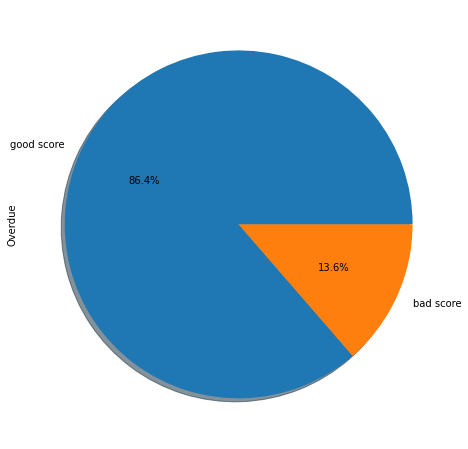

In [ ]:
df['Overdue'].value_counts().plot.pie(x=[0.1,0.1,0.1],autopct='%1.1f%%'
                                        ,shadow=True, figsize=(10,8))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


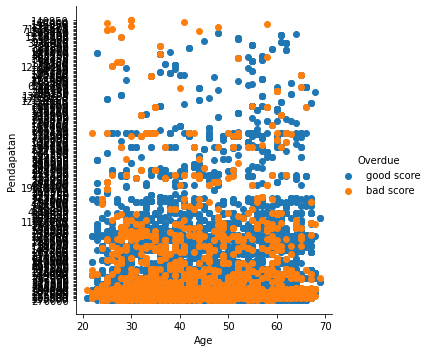

In [ ]:
#scatter plot of Pekerjaan vs Pendapatan on Overdue
sns.FacetGrid(df, hue="Overdue", size=5) \
   .map(plt.scatter, "Age", "Pendapatan") \
   .add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


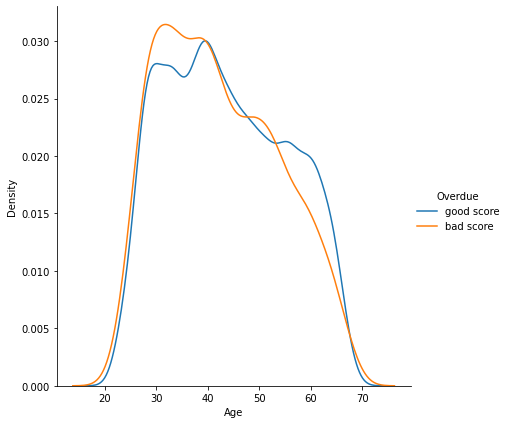

In [ ]:
sns.FacetGrid(df, hue="Overdue", size=6) \
   .map(sns.kdeplot, "Age") \
   .add_legend()

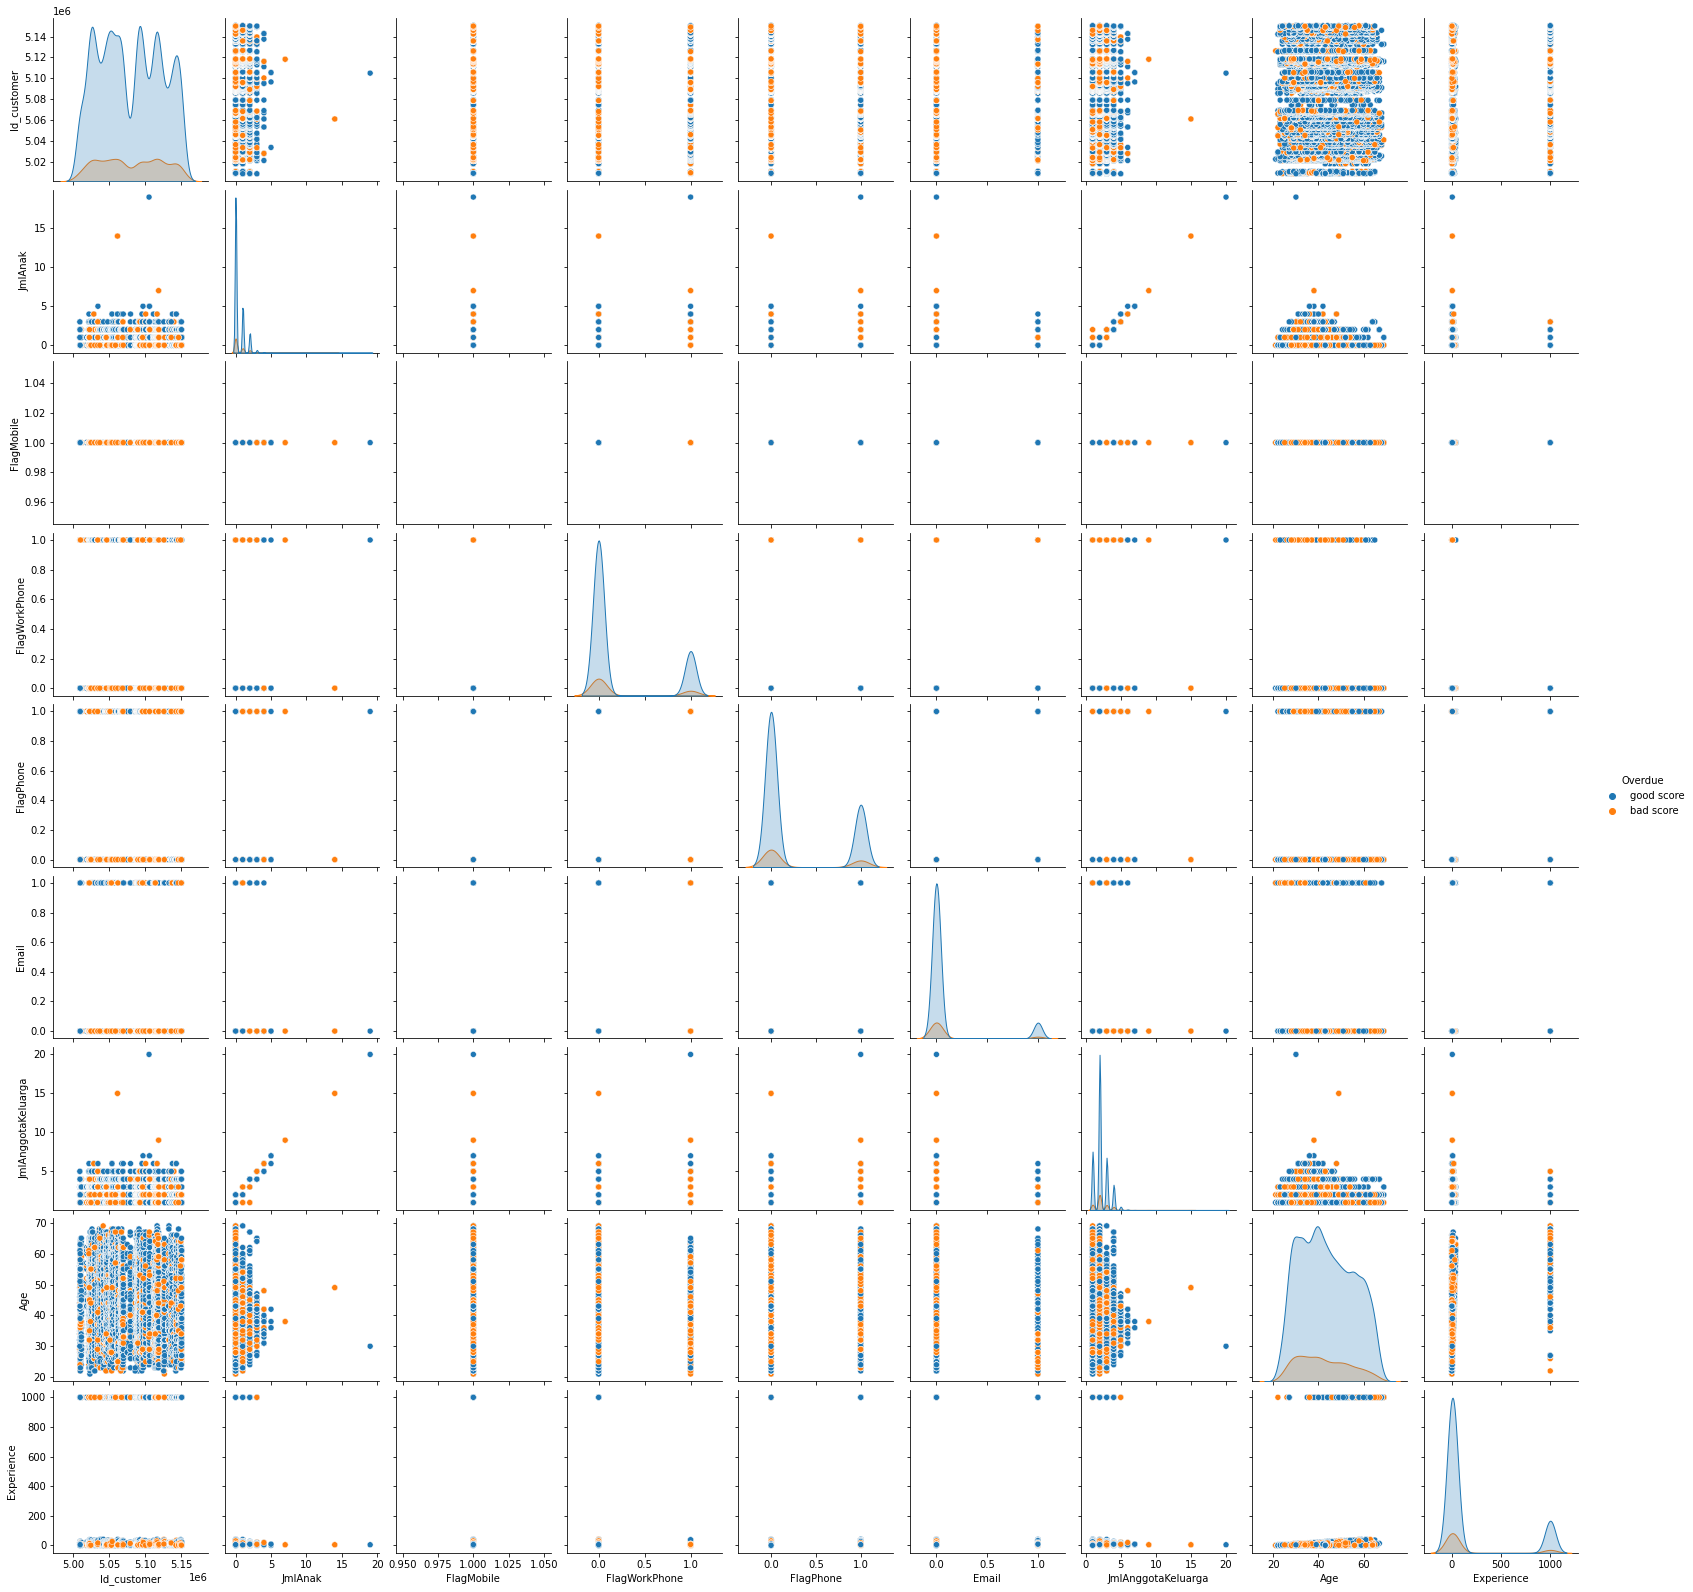

In [ ]:
sns.pairplot(df , hue='Overdue');

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-27-0890aefbf3d8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Id_customer,JmlAnak,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
Id_customer,1.00,0.03,nan,0.08,0.01,-0.05,0.02,-0.05,-0.05
JmlAnak,0.03,1.00,nan,0.07,-0.01,0.02,0.89,-0.33,-0.23
FlagMobile,nan,nan,nan,nan,nan,nan,nan,nan,nan
FlagWorkPhone,0.08,0.07,nan,1.00,0.32,-0.03,0.07,-0.18,-0.24
FlagPhone,0.01,-0.01,nan,0.32,1.00,0.02,-0.01,0.02,-0.01
Email,-0.05,0.02,nan,-0.03,0.02,1.00,0.02,-0.11,-0.08
JmlAnggotaKeluarga,0.02,0.89,nan,0.07,-0.01,0.02,1.00,-0.29,-0.22
Age,-0.05,-0.33,nan,-0.18,0.02,-0.11,-0.29,1.00,0.63
Experience,-0.05,-0.23,nan,-0.24,-0.01,-0.08,-0.22,0.63,1.00


### Imbalance Data Check and Handling

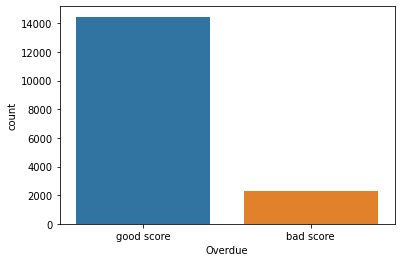

In [ ]:
sns.countplot(x ='Overdue', data = df)

In this chart shows that good score have more values than bad score. So this data imbalance.

In [ ]:
df['Overdue'].mask(df['Overdue'] == 'good score', 0, inplace=True)
df['Overdue'].mask(df['Overdue'] == 'bad score', 1, inplace=True)

In [ ]:
# menurunkan data good score
df_under = df[df['Overdue']<=0]
df_under = df_under.sample(n=10000)
df_under

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
165280,5091024,Perempuan,Tidak,Ya,0,130500,Pensioner,G,M,MH,1,0,0,0,Laborers,2,64,1001,0
144987,5010378,Perempuan,Ya,Ya,0,270000,Pensioner,G,M,MH,1,0,0,0,Laborers,2,65,1001,0
8604,5090118,Laki-laki,Tidak,Ya,0,270000,Asosiasi komersial,G,M,MH,1,0,0,1,Laborers,2,39,2,0
14961,5142513,Laki-laki,Tidak,Ya,1,202500,Bekerja,G,NM,MH,1,0,0,0,Laborers,2,33,3,0
204,5009425,Laki-laki,Tidak,Tidak,0,108000,Bekerja,G,NM,OA,1,1,0,0,Cooking staff,1,22,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160422,5068770,Perempuan,Tidak,Tidak,0,135000,Bekerja,G,M,MH,1,0,0,0,Core staff,2,45,6,0
148159,5025074,Perempuan,Tidak,Ya,0,171000,Bekerja,G,M,MH,1,1,1,0,Managers,2,52,21,0
155178,5046264,Perempuan,Tidak,Ya,0,333000,Pensioner,G,NM,MH,1,0,0,0,Laborers,1,61,1001,0
174735,5135858,Perempuan,Tidak,Ya,1,180000,Asosiasi komersial,G,M,MH,1,0,1,0,Laborers,3,44,17,0


In [ ]:
df = pd.concat([df_under,df[df['Overdue']>=1]],ignore_index=True)
df

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5091024,Perempuan,Tidak,Ya,0,130500,Pensioner,G,M,MH,1,0,0,0,Laborers,2,64,1001,0
1,5010378,Perempuan,Ya,Ya,0,270000,Pensioner,G,M,MH,1,0,0,0,Laborers,2,65,1001,0
2,5090118,Laki-laki,Tidak,Ya,0,270000,Asosiasi komersial,G,M,MH,1,0,0,1,Laborers,2,39,2,0
3,5142513,Laki-laki,Tidak,Ya,1,202500,Bekerja,G,NM,MH,1,0,0,0,Laborers,2,33,3,0
4,5009425,Laki-laki,Tidak,Tidak,0,108000,Bekerja,G,NM,OA,1,1,0,0,Cooking staff,1,22,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,5149056,Perempuan,Tidak,Ya,0,112500,Asosiasi komersial,G,M,MH,1,1,1,0,Laborers,2,43,7,1
12279,5149834,Perempuan,Tidak,Ya,0,157500,Asosiasi komersial,PG,M,MH,1,0,1,1,Medicine staff,2,34,4,1
12280,5149838,Perempuan,Tidak,Ya,0,157500,Pensioner,PG,M,MH,1,0,1,1,Medicine staff,2,34,4,1
12281,5150049,Perempuan,Tidak,Ya,0,283500,Bekerja,G,M,MH,1,0,0,0,Sales staff,2,49,2,1


In [ ]:
#encoding data
df['JK'] = df['JK'].map({'Perempuan': 1, 'Laki-laki': 2})
df['KepemilikanMobil'] = df['KepemilikanMobil'].map({'Ya': 1, 'Tidak': 0})
df['KepemilikanProperti'] = df['KepemilikanProperti'].map({'Ya': 1, 'Tidak': 0})
df['TipePendapatan'] = df['TipePendapatan'].map({'Mahasiswa/Murid': 1, 'Pensioner': 2, 'Bekerja': 3, 'PNS': 4, 'Asosiasi komersial': 5})
df['TingkatPendidikan'] = df['TingkatPendidikan'].map({'UG': 1, 'PG': 2, 'G': 3})
df['StatusKeluarga'] = df['StatusKeluarga'].map({'NM': 1, 'M': 2, 'D': 3})
df['TipeRumah'] = df['TipeRumah'].map({'PH': 1, 'MH': 2, 'RA': 3, 'OA': 4, 'MA': 5})
df['Pekerjaan'] = df['Pekerjaan'].map({'Waiters/barmen staff': 1, 'Cooking staff': 2, 'Security staff': 3, 'Private service staff': 4, 'Realty agents': 5, 'Secretaries': 6, 'Laborers': 7, 'High skill tech staff': 8, 'Drivers': 9, 'Accountants': 10, 'Sales staff': 11, 'Low-skill Laborers': 12, 'Core staff': 13, 'IT staff': 14, 'HR staff': 15, 'Cleaning staff': 16, 'Managers': 17, 'Medicine staff': 18})
df

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5091024,1,0,1,0,130500,2,3,2,2,1,0,0,0,7,2,64,1001,0
1,5010378,1,1,1,0,270000,2,3,2,2,1,0,0,0,7,2,65,1001,0
2,5090118,2,0,1,0,270000,5,3,2,2,1,0,0,1,7,2,39,2,0
3,5142513,2,0,1,1,202500,3,3,1,2,1,0,0,0,7,2,33,3,0
4,5009425,2,0,0,0,108000,3,3,1,4,1,1,0,0,2,1,22,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,5149056,1,0,1,0,112500,5,3,2,2,1,1,1,0,7,2,43,7,1
12279,5149834,1,0,1,0,157500,5,2,2,2,1,0,1,1,18,2,34,4,1
12280,5149838,1,0,1,0,157500,2,2,2,2,1,0,1,1,18,2,34,4,1
12281,5150049,1,0,1,0,283500,3,3,2,2,1,0,0,0,11,2,49,2,1


In [ ]:
#change , to . cause make eror on handling imbalance data
df['Pendapatan'] = df['Pendapatan'].astype(str)
df['Pendapatan'] = df['Pendapatan'].str.replace(',', '.')

In [ ]:
#cange data type
df['Pendapatan'] = df['Pendapatan'].astype(float)

In [ ]:
# split label to x & y
y = df['Overdue']
x = df.drop(['Overdue', 'Id_customer'], axis = 1)
y = y.astype(int)

In [ ]:
# split data to data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 ,random_state = 42, stratify=y)

In [ ]:
#handling imbalance data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=12)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(X_train_sm.shape)
print(y_train_sm.shape)

(14000, 17)
(14000,)


In [ ]:
y_train_sm.value_counts()

0    7000
1    7000
Name: Overdue, dtype: int64

In [ ]:
y_test.value_counts()

0    3000
1     685
Name: Overdue, dtype: int64

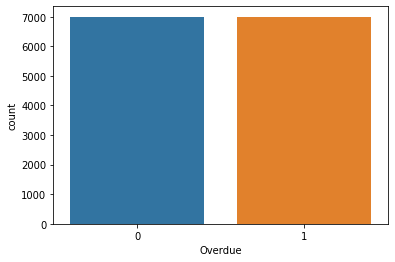

In [ ]:
sns.countplot(x = y_train_sm, data = df)

## Modelling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Ukuran X_train :", X_train_sm.shape)
print("Ukuran X_tes :", X_test.shape)
print("Ukuran y_train :", y_train_sm.shape)
print("Ukuran y_tes :", y_test.shape)

Ukuran X_train : (14000, 17)
Ukuran X_tes : (3685, 17)
Ukuran y_train : (14000,)
Ukuran y_tes : (3685,)


### Decision Tree

In [ ]:
x.head()

,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,1,0,1,0,130500.0,2,3,2,2,1,0,0,0,7,2,64,1001
1,1,1,1,0,270000.0,2,3,2,2,1,0,0,0,7,2,65,1001
2,2,0,1,0,270000.0,5,3,2,2,1,0,0,1,7,2,39,2
3,2,0,1,1,202500.0,3,3,1,2,1,0,0,0,7,2,33,3
4,2,0,0,0,108000.0,3,3,1,4,1,1,0,0,2,1,22,4


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_sm, y_train_sm)

In [ ]:
prediksi = model.predict(X_test)
print(prediksi.shape)
print(y_test.shape)

(3685,)
(3685,)


In [ ]:
matrix = confusion_matrix(y_test, prediksi)
matrix

array([[2567,  433],
       [ 346,  339]])

In [ ]:
accuracy = accuracy_score(y_test, prediksi)
accuracy

0.7886024423337856

In [ ]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3000
           1       0.44      0.49      0.47       685

    accuracy                           0.79      3685
   macro avg       0.66      0.68      0.67      3685
weighted avg       0.80      0.79      0.79      3685



### SVM

In [ ]:
from sklearn.svm import SVC
model_1 = SVC(gamma='auto')
model_1 = model_1.fit(X_train_sm, y_train_sm)

In [ ]:
prediksi1 = model_1.predict(X_test)
print(prediksi1.shape)
print(y_test.shape)

(3685,)
(3685,)


In [ ]:
confusion_matrix(y_test, prediksi1)

array([[2520,  480],
       [ 352,  333]])

In [ ]:
accuracy_score(y_test, prediksi1)

0.7742198100407056

In [ ]:
print(classification_report(y_test, prediksi1))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3000
           1       0.41      0.49      0.44       685

    accuracy                           0.77      3685
   macro avg       0.64      0.66      0.65      3685
weighted avg       0.79      0.77      0.78      3685



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2 = model_2.fit(X_train_sm, y_train_sm)

In [ ]:
prediksi2 = model_2.predict(X_test)
print(prediksi2.shape)
print(y_test.shape)

(3685,)
(3685,)


In [ ]:
confusion_matrix(y_test, prediksi2)

array([[ 725, 2275],
       [ 126,  559]])

In [ ]:
accuracy_score(y_test, prediksi2)

0.3484396200814111

In [ ]:
print(classification_report(y_test, prediksi2))

              precision    recall  f1-score   support

           0       0.85      0.24      0.38      3000
           1       0.20      0.82      0.32       685

    accuracy                           0.35      3685
   macro avg       0.52      0.53      0.35      3685
weighted avg       0.73      0.35      0.37      3685



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=100, random_state=42)
model_3.fit(X_train_sm, y_train_sm)
prediksi2 = model_3.predict(X_test)

In [ ]:
prediksi3 = model_3.predict(X_test)
print(prediksi3.shape)
print(y_test.shape)

(3685,)
(3685,)


In [ ]:
confusion_matrix(y_test, prediksi3)

array([[2647,  353],
       [ 348,  337]])

In [ ]:
accuracy_score(y_test, prediksi3)

0.8097693351424695

In [ ]:
print(classification_report(y_test, prediksi3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3000
           1       0.49      0.49      0.49       685

    accuracy                           0.81      3685
   macro avg       0.69      0.69      0.69      3685
weighted avg       0.81      0.81      0.81      3685



<BarContainer object of 17 artists>

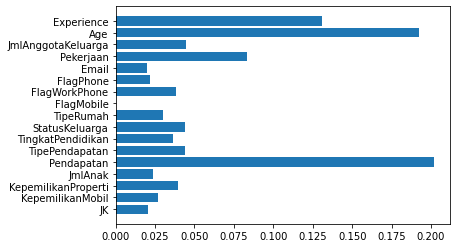

In [ ]:
#Check importance features
import matplotlib.pyplot as plt
model_3.feature_importances_
x_res_name = list(X_train_sm.columns)
plt.barh(x_res_name, model.feature_importances_)

### Neural Network

In [ ]:
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model_4 = Sequential()
model_4.add(Dense(32, input_shape=(17,)))
model_4.add(Dense(32, activation="relu"))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=["accuracy"])

In [ ]:
model_4.fit(X_train_sm, y_train_sm, epochs = 50)

Epoch 1/50
438/438 [==============================] - 4s 3ms/step - loss: 285.4749 - accuracy: 0.5056
Epoch 2/50
438/438 [==============================] - 1s 3ms/step - loss: 309.2885 - accuracy: 0.5048
Epoch 3/50
438/438 [==============================] - 1s 3ms/step - loss: 314.6650 - accuracy: 0.5079
Epoch 4/50
438/438 [==============================] - 1s 3ms/step - loss: 256.7008 - accuracy: 0.5023
Epoch 5/50
438/438 [==============================] - 1s 3ms/step - loss: 220.1651 - accuracy: 0.5049
Epoch 6/50
438/438 [==============================] - 1s 3ms/step - loss: 154.4078 - accuracy: 0.5038
Epoch 7/50
438/438 [==============================] - 1s 3ms/step - loss: 234.5501 - accuracy: 0.5051
Epoch 8/50
438/438 [==============================] - 1s 3ms/step - loss: 212.2920 - accuracy: 0.5089
Epoch 9/50
438/438 [==============================] - 1s 3ms/step - loss: 228.4263 - accuracy: 0.5053
Epoch 10/50
438/438 [==============================] - 1s 3ms/step - loss: 153.834

In [ ]:
y_pred = model_4.predict(X_test)
import numpy as np
y_pred = np.where(y_pred >= 0.95*y_pred.max(), 1, 0)
print(classification_report(y_test, y_pred))

116/116 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3000
           1       1.00      0.00      0.00       685

    accuracy                           0.81      3685
   macro avg       0.91      0.50      0.45      3685
weighted avg       0.85      0.81      0.73      3685



## Data Test

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/Celerates BDBI/Data Set final project/data_test.csv')
dft.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0


In [ ]:
modus = dft['Pekerjaan'].mode()[0]
dft['Pekerjaan'] = dft['Pekerjaan'].fillna(modus)
dft['Pekerjaan'].isna().sum()

0

In [ ]:
dft['Pekerjaan'].value_counts()

Laborers                 93
Core staff               16
Managers                 16
Sales staff              14
High skill tech staff    13
Drivers                  12
Medicine staff           10
Cooking staff             7
Cleaning staff            5
Accountants               5
Security staff            4
Private service staff     3
Waiters/barmen staff      2
Name: Pekerjaan, dtype: int64

In [ ]:
dft['TingkatPendidikan'] = dft['TingkatPendidikan'].str.lower()
dft['StatusKeluarga'] = dft['StatusKeluarga'].str.lower()
dft['TipeRumah'] = dft['TipeRumah'].str.lower()

In [ ]:
dft['JK'] = dft['JK'].map({'Perempuan': 1, 'Laki-laki': 2})
dft['KepemilikanMobil'] = dft['KepemilikanMobil'].map({'Ya': 1, 'Tidak': 0})
dft['KepemilikanProperti'] = dft['KepemilikanProperti'].map({'Ya': 1, 'Tidak': 0})
dft['TipePendapatan'] = dft['TipePendapatan'].map({'Mahasiswa/Murid': 1, 'Pensioner': 2, 'Bekerja': 3, 'PNS': 4, 'Asosiasi komersial': 5})
dft['TingkatPendidikan'] = dft['TingkatPendidikan'].map({'undergraduate': 1, 'postgraduate': 2, 'graduate': 3})
dft['StatusKeluarga'] = dft['StatusKeluarga'].map({'belum menikah': 1, 'menikah': 2, 'cerai': 3})
dft['TipeRumah'] = dft['TipeRumah'].map({'rumah orang tua': 1, 'rumah pribadi': 2, 'sewa apartemen': 3, 'apartemen kantor': 4, 'apartemen pribadi': 5})
dft['Pekerjaan'] = dft['Pekerjaan'].map({'Waiters/barmen staff': 1, 'Cooking staff': 2, 'Security staff': 3, 'Private service staff': 4, 'Realty agents': 5, 'Secretaries': 6, 'Laborers': 7, 'High skill tech staff': 8, 'Drivers': 9, 'Accountants': 10, 'Sales staff': 11, 'Low-skill Laborers': 12, 'Core staff': 13, 'IT staff': 14, 'HR staff': 15, 'Cleaning staff': 16, 'Managers': 17, 'Medicine staff': 18})
dft

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,1,0,1,0,225000.0,4,3,2,2,1,0,0,0,4,2.0,54.0,6.0
1,5036925,1,1,1,0,157500.0,5,3,2,2,1,1,1,1,13,2.0,33.0,8.0
2,5126080,1,0,1,1,112500.0,4,3,2,2,1,0,0,0,17,3.0,41.0,7.0
3,5088887,1,0,1,0,171000.0,3,3,1,3,1,0,0,0,7,1.0,46.0,2.0
4,5022156,1,1,1,2,180000.0,5,2,2,2,1,0,1,1,7,4.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,2,0,1,0,360000.0,3,3,2,2,1,1,0,0,7,2.0,50.0,29.0
196,5116026,1,0,1,0,135000.0,2,3,2,2,1,0,0,0,7,2.0,56.0,1001.0
197,5067627,1,0,0,1,67500.0,3,3,2,2,1,0,0,0,7,3.0,45.0,19.0
198,5090052,2,1,1,0,270000.0,5,2,2,2,1,0,0,0,17,2.0,58.0,5.0


In [ ]:
x = dft.drop('Id_customer', axis=1)

In [ ]:
y_pred = model_3.predict(x)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [ ]:
result = pd.DataFrame({
    'id':dft['Id_customer'],
    'value':y_pred.flatten().tolist()
})

In [ ]:
result.head()

,id,value
0,5142248,1
1,5036925,0
2,5126080,0
3,5088887,1
4,5022156,0


In [ ]:
result.to_csv('Submision Final Project.csv', index=False)